In [1]:
! pip install --upgrade pip

In [2]:
! pip install openai langchain==0.0.239 pandasai

In [3]:
import os
import pandas as pd
import openai
from pandasai import PandasAI
from langchain.chat_models import ChatOpenAI

In [5]:
df = pd.read_csv('../data/mock_date_patitients_visits.csv')
df.head()

,patient_id,patient_name,weight,systolic_bp,diastolic_bp,date
0,PID00000,Eleanor Pires,91,130,84,2018-10-25
1,PID00000,Eleanor Pires,101,135,87,2019-10-25
2,PID00000,Eleanor Pires,100,130,87,2020-10-25
3,PID00001,Michael Dobek,88,91,72,2018-01-17
4,PID00001,Michael Dobek,79,90,74,2019-01-17


In [27]:
#AZURE_OPENAI_KEY = "-"
#AZURE_OPENAI_ENDPOINT = "-"
#AZURE_ENGINE_NAME = "-"

openai.api_type = "azure"
openai.api_base = AZURE_OPENAI_ENDPOINT
openai.api_version = "2023-05-15"
openai.api_key = AZURE_OPENAI_KEY

In [17]:
llm = ChatOpenAI(
    temperature=0,
    openai_api_key=AZURE_OPENAI_KEY,
    engine=AZURE_ENGINE_NAME,
    deployment_id= AZURE_OPENAI_ENDPOINT
    )

                    engine was transferred to model_kwargs.
                    Please confirm that engine is what you intended.
                    deployment_id was transferred to model_kwargs.
                    Please confirm that deployment_id is what you intended.


In [18]:
pandas_ai = PandasAI(llm)
x = pandas_ai(df, prompt='Which are the 4 heaviest patients?')

In [19]:
x

patient_id
PID00295    126
PID02222    126
PID02742    125
PID02332    124
Name: weight, dtype: int64

In [29]:
prompt = 'Which are the 5 heavyest patients?'
tmp_df = pandas_ai(df, prompt=prompt)
tmp_df

,patient_id,patient_name,weight,systolic_bp,diastolic_bp,date
1175,PID00295,Mary Fink,126,107,56,2022-06-13
8864,PID02222,Keith Howard,126,122,74,2022-10-27
10926,PID02742,Katherine Ebert,125,92,70,2022-09-09
9302,PID02332,Gilbert Lopez,124,88,70,2022-05-06
21,PID00005,Charles Williams,123,86,78,2022-09-19


<Axes: >

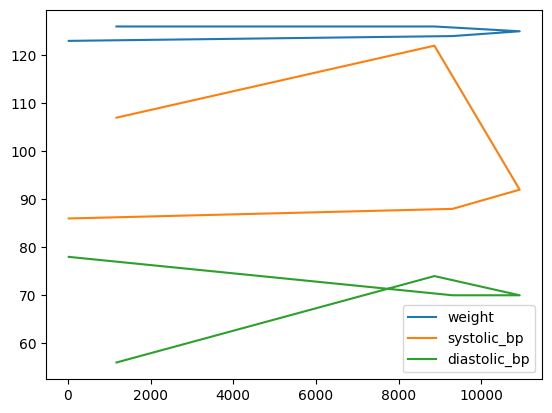

In [26]:
tmp_df.plot(kind='line')

In [28]:
prompt = 'What is the weight of patient PID02742?'
prompt = 'What is the highest bllop pressure registered?'
tmp_df = pandas_ai(df, prompt=prompt)
tmp_df

143

In [32]:
sys_content = "You classify a sentence intoone of: 'retrival'; 'plot'; 'question'"
prompt = 'What is the weight of patient PID02742?'

completion = openai.ChatCompletion.create(
  engine=AZURE_ENGINE_NAME,
  messages=[
    {"role": "system", "content": sys_content},
    {"role": "user", "content": 'What is the weight of patient PID02742?'},
    {"role": "assistant", "content": 'question'},
    {"role": "user", "content": 'What is the highest bllop pressure registered?'},
    {"role": "assistant", "content": 'question'},
    {"role": "user", "content": 'Show me the data for the 5 heavyest patients'},
    {"role": "assistant", "content": 'retrieval'},
    {"role": "user", "content": 'Give me the all the information for patient PID00001'},
    {"role": "assistant", "content": 'retrieval'},
    {"role": "user", "content": 'Plot the data for Keith Howard weight'},
    {"role": "assistant", "content": 'plot'},
    {"role": "user", "content": 'Make a graph with patient PID00001 blood pressure'},
    {"role": "assistant", "content": 'plot'},
    {"role": "user", "content": prompt},

  ]
)

In [35]:
print(completion.choices[0].message.content)

question


In [38]:
prompt = 'Give me a plot for the patient Gilbert Lopez weight'
completion = openai.ChatCompletion.create(
  engine=AZURE_ENGINE_NAME,
  messages=[
    {"role": "system", "content": sys_content},
    {"role": "user", "content": 'What is the weight of patient PID02742?'},
    {"role": "assistant", "content": 'question'},
    {"role": "user", "content": 'What is the highest bllop pressure registered?'},
    {"role": "assistant", "content": 'question'},
    {"role": "user", "content": 'Show me the data for the 5 heavyest patients'},
    {"role": "assistant", "content": 'retrieval'},
    {"role": "user", "content": 'Give me the all the information for patient PID00001'},
    {"role": "assistant", "content": 'retrieval'},
    {"role": "user", "content": 'Plot the data for Keith Howard weight'},
    {"role": "assistant", "content": 'plot'},
    {"role": "user", "content": 'Make a graph with patient PID00001 blood pressure'},
    {"role": "assistant", "content": 'plot'},
    {"role": "user", "content": prompt},

  ]
)
print(completion.choices[0].message.content)

plot


In [39]:
prompt = 'Give teh data for the patient Gilbert Lopez weight'
completion = openai.ChatCompletion.create(
  engine=AZURE_ENGINE_NAME,
  messages=[
    {"role": "system", "content": sys_content},
    {"role": "user", "content": 'What is the weight of patient PID02742?'},
    {"role": "assistant", "content": 'question'},
    {"role": "user", "content": 'What is the highest bllop pressure registered?'},
    {"role": "assistant", "content": 'question'},
    {"role": "user", "content": 'Show me the data for the 5 heavyest patients'},
    {"role": "assistant", "content": 'retrieval'},
    {"role": "user", "content": 'Give me the all the information for patient PID00001'},
    {"role": "assistant", "content": 'retrieval'},
    {"role": "user", "content": 'Plot the data for Keith Howard weight'},
    {"role": "assistant", "content": 'plot'},
    {"role": "user", "content": 'Make a graph with patient PID00001 blood pressure'},
    {"role": "assistant", "content": 'plot'},
    {"role": "user", "content": prompt},

  ]
)
print(completion.choices[0].message.content)

retrieval


use this prompt to know what to output

use the pandas_ai to retrieve the needed data